In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import rand_score

In [2]:
# Objective: Understand clustering behavior as data dimensionality increases.
# This often involves observing the impact of the "curse of dimensionality" on clustering algorithms.

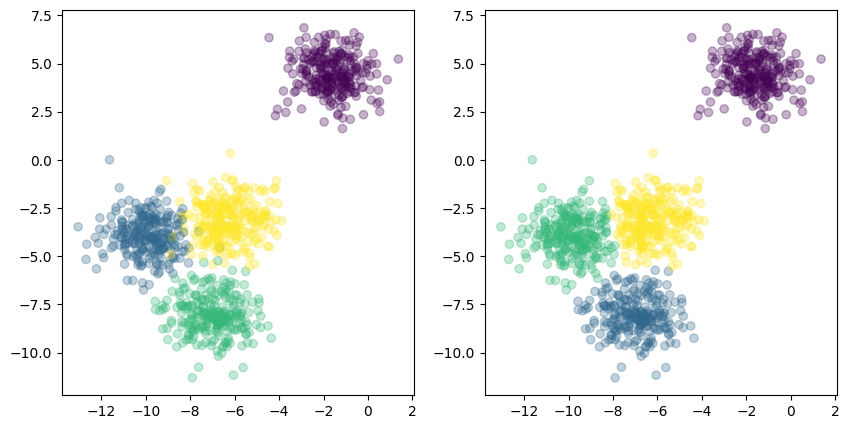

In [3]:
# Generate 2D data.
# This creates a dataset with two features (dimensions) for visualization or initial testing.

X_large, y_large = make_blobs(n_samples=1000,
                  centers=4,
                  cluster_std=1,
                  n_features=2,
                  random_state=1)

kmeans_clust = KMeans(4)
kmeans_clust.fit(X_large)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.scatter(X_large[:, 0], X_large[:, 1], c=y_large, alpha=0.3);
ax2.scatter(X_large[:, 0], X_large[:, 1], c=kmeans_clust.labels_, alpha=0.3);

In [4]:
# Clusters exhibit some overlap, resulting in a non-ideal Rand Index (RI) score.
rand_score(y_large, kmeans_clust.labels_)

np.float64(0.9843543543543544)

In [5]:
# Let's examine how the clustering score changes as dimensionality increases.
dims = [2, 5, 10, 50, 150, 500, 1000]

for dim in dims:
    X_large, y_large = make_blobs(n_samples=10000,
                    centers=4,
                    cluster_std=1,
                    n_features=dim,
                    random_state=1)

    kmeans_clust = KMeans(4)
    kmeans_clust.fit(X_large)

    print(rand_score(y_large, kmeans_clust.labels_))

0.9827372537253726
1.0
1.0
1.0
1.0
1.0
1.0


In [6]:
# The metric consistently improves

In [7]:
# Increase the noise level in the data by setting 'cluster_std' to 3.
dims = [2, 5, 10, 50, 150, 500, 1000]

for dim in dims:
    X_large, y_large = make_blobs(n_samples=10000,
                    centers=4,
                    cluster_std=3,
                    n_features=dim,
                    random_state=1)

    kmeans_clust = KMeans(4)
    kmeans_clust.fit(X_large)

    print(rand_score(y_large, kmeans_clust.labels_))

0.7783244324432443
0.9807625762576258
0.9994006600660066
1.0
1.0
1.0
1.0


In [8]:
# The metric continues to improve (or remains high), even with increased noise.
# In such synthetic datasets, the values tend to average out, effectively mitigating randomness and noise.
# This can mask the true impact of increased dimensionality or noise on clustering performance,
# as the underlying statistical properties (e.g., means of clusters) remain distinct enough for the algorithm.

In [9]:
# Generate one normally distributed feature with distinct means for each cluster,
# while the remaining features are uniformly distributed.
# This setup aims to create a scenario where one feature provides strong cluster separation,
# and others act as 'noise' or less informative dimensions, allowing us to observe their impact.

dims = [2, 5, 10, 50, 150, 500, 1000]

for dim in dims:
    X = np.random.random(size=(10000, dim))

    X_norm, y_norm = make_blobs(n_samples=10000,
                    centers=4,
                    cluster_std=0.1,
                    n_features=1,
                    center_box=(0, 3), # Centroids are placed within these bounds to match the scale of the uniform distribution.
                    random_state=1)
    X[:, -1:] = X_norm

    kmeans_clust = KMeans(4)
    kmeans_clust.fit(X)

    print(rand_score(y_norm, kmeans_clust.labels_))

0.875195099509951
0.8750395239523953
0.8749807580758076
0.8749939793979398
0.8435355135513551
0.8432875087508751
0.8750674067406741


In [10]:
# Clustering quality dropped, but with no clear effect from increased dimensionality.

In [11]:
# The current number of observations might be sufficient to counteract the "curse of dimensionality."
# With high-dimensional data, more observations are generally needed to ensure clusters are well-defined.
# Let's try reducing the number of observations to see its impact on clustering performance,
# as a lower sample size might reveal the negative effects of increased dimensionality more clearly.

dims = [2, 5, 10, 50, 150, 500, 1000]

for dim in dims:
    X = np.random.random(size=(300, dim))

    X_norm, y_norm = make_blobs(n_samples=300,
                    centers=4,
                    cluster_std=0.1,
                    n_features=1,
                    center_box=(0, 3),
                    random_state=1)
    X[:, -1:] = X_norm

    kmeans_clust = KMeans(4)
    kmeans_clust.fit(X)

    print(rand_score(y_norm, kmeans_clust.labels_))

0.8749386845039019
0.8795986622073578
0.8745819397993311
0.8392865105908585
0.8130880713489409
0.7318617614269788
0.6276254180602007


In [12]:
# With 300 observations generated, a noticeable deterioration in clustering quality is observed as dimensionality increases.
# This confirms that a smaller sample size makes the "curse of dimensionality" more apparent,
# as the data becomes sparser and distances less meaningful in higher dimensions.